# Necessary libraries

In [8]:
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# Load the dataset & showing categories

In [2]:
dataset_path = "/content/drive/MyDrive/animals"

categories=os.listdir(dataset_path)
print(categories)

['cats', 'panda', 'dogs']


#Selecting random 300 photos and training the dataset

In [3]:
train_data = []

for c in categories:
    path = os.path.join(dataset_path, c)
    class_index = categories.index(c)

    all_images = os.listdir(path)
    selected_images = random.sample(all_images, 100)

    for img in tqdm(selected_images, desc=f'Processing {c}'):
        img_path = os.path.join(path, img)
        try:
            img_arr = cv2.imread(img_path)
            if img_arr is None:
                continue

            img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2GRAY)
            img_arr = cv2.resize(img_arr, (32, 32))
            train_data.append([img_arr, class_index])
        except Exception as e:
            print(f"Error processing {img_path}: {e}")

random.shuffle(train_data)
print(f"\nTotal training samples: {len(train_data)}")   # Should be 300 (100 per class)

Processing dogs: 100%|██████████| 100/100 [00:30<00:00,  3.26it/s]


Total training samples: 300


#Shuffling the training data

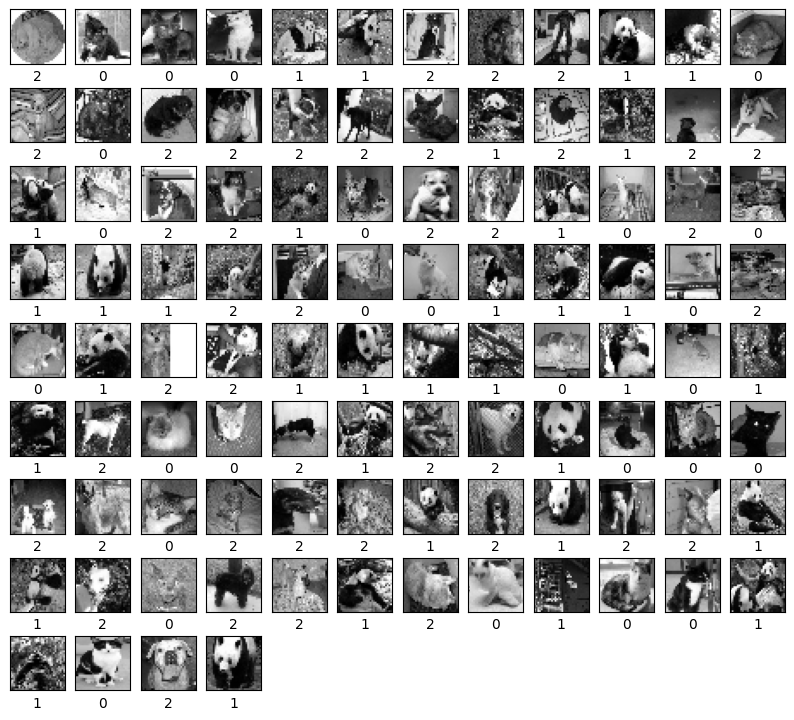

In [4]:
random.shuffle(train_data)
plt.figure(figsize=(10,10))
i=0
for r in range(10):
  for c in range(10):
    plt.subplot(10,12,i+1)
    plt.imshow(train_data[i][0],cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(train_data[i][1])
    i+=1
plt.show()

# Convert train data to NumPy arrays

In [5]:
X = np.array([x[0] for x in train_data])
y = np.array([x[1] for x in train_data])

# Defining folds

In [6]:
n_folds = 5
fold_size = len(X) // n_folds
folds_X = [X[i*fold_size : (i+1)*fold_size] for i in range(n_folds)]
folds_y = [y[i*fold_size : (i+1)*fold_size] for i in range(n_folds)]

#Finiding maximum accuracies with k-fold

Fold 1, k=1: 100%|██████████| 60/60 [00:00<00:00, 1736.77it/s]


Fold 1, k=1: L1 Accuracy = 23.33%, L2 Accuracy = 43.33%


Fold 1, k=3: 100%|██████████| 60/60 [00:00<00:00, 1862.49it/s]


Fold 1, k=3: L1 Accuracy = 28.33%, L2 Accuracy = 36.67%


Fold 1, k=5: 100%|██████████| 60/60 [00:00<00:00, 1732.38it/s]


Fold 1, k=5: L1 Accuracy = 31.67%, L2 Accuracy = 46.67%


Fold 1, k=7: 100%|██████████| 60/60 [00:00<00:00, 1775.45it/s]


Fold 1, k=7: L1 Accuracy = 31.67%, L2 Accuracy = 43.33%


Fold 1, k=9: 100%|██████████| 60/60 [00:00<00:00, 1762.58it/s]


Fold 1, k=9: L1 Accuracy = 28.33%, L2 Accuracy = 50.00%


Fold 2, k=1: 100%|██████████| 60/60 [00:00<00:00, 1612.56it/s]


Fold 2, k=1: L1 Accuracy = 41.67%, L2 Accuracy = 46.67%


Fold 2, k=3: 100%|██████████| 60/60 [00:00<00:00, 1358.68it/s]


Fold 2, k=3: L1 Accuracy = 33.33%, L2 Accuracy = 41.67%


Fold 2, k=5: 100%|██████████| 60/60 [00:00<00:00, 1380.95it/s]


Fold 2, k=5: L1 Accuracy = 33.33%, L2 Accuracy = 43.33%


Fold 2, k=7: 100%|██████████| 60/60 [00:00<00:00, 1873.45it/s]


Fold 2, k=7: L1 Accuracy = 36.67%, L2 Accuracy = 41.67%


Fold 2, k=9: 100%|██████████| 60/60 [00:00<00:00, 1805.30it/s]


Fold 2, k=9: L1 Accuracy = 31.67%, L2 Accuracy = 45.00%


Fold 3, k=1: 100%|██████████| 60/60 [00:00<00:00, 1712.60it/s]


Fold 3, k=1: L1 Accuracy = 40.00%, L2 Accuracy = 40.00%


Fold 3, k=3: 100%|██████████| 60/60 [00:00<00:00, 1819.46it/s]


Fold 3, k=3: L1 Accuracy = 43.33%, L2 Accuracy = 33.33%


Fold 3, k=5: 100%|██████████| 60/60 [00:00<00:00, 1510.07it/s]


Fold 3, k=5: L1 Accuracy = 41.67%, L2 Accuracy = 40.00%


Fold 3, k=7: 100%|██████████| 60/60 [00:00<00:00, 1686.34it/s]


Fold 3, k=7: L1 Accuracy = 43.33%, L2 Accuracy = 45.00%


Fold 3, k=9: 100%|██████████| 60/60 [00:00<00:00, 1625.39it/s]


Fold 3, k=9: L1 Accuracy = 31.67%, L2 Accuracy = 58.33%


Fold 4, k=1: 100%|██████████| 60/60 [00:00<00:00, 1673.92it/s]


Fold 4, k=1: L1 Accuracy = 33.33%, L2 Accuracy = 51.67%


Fold 4, k=3: 100%|██████████| 60/60 [00:00<00:00, 1858.33it/s]


Fold 4, k=3: L1 Accuracy = 31.67%, L2 Accuracy = 56.67%


Fold 4, k=5: 100%|██████████| 60/60 [00:00<00:00, 1797.17it/s]


Fold 4, k=5: L1 Accuracy = 33.33%, L2 Accuracy = 55.00%


Fold 4, k=7: 100%|██████████| 60/60 [00:00<00:00, 1758.77it/s]


Fold 4, k=7: L1 Accuracy = 38.33%, L2 Accuracy = 53.33%


Fold 4, k=9: 100%|██████████| 60/60 [00:00<00:00, 1760.86it/s]


Fold 4, k=9: L1 Accuracy = 41.67%, L2 Accuracy = 45.00%


Fold 5, k=1: 100%|██████████| 60/60 [00:00<00:00, 1686.27it/s]


Fold 5, k=1: L1 Accuracy = 31.67%, L2 Accuracy = 51.67%


Fold 5, k=3: 100%|██████████| 60/60 [00:00<00:00, 1903.75it/s]


Fold 5, k=3: L1 Accuracy = 30.00%, L2 Accuracy = 48.33%


Fold 5, k=5: 100%|██████████| 60/60 [00:00<00:00, 1894.45it/s]


Fold 5, k=5: L1 Accuracy = 33.33%, L2 Accuracy = 55.00%


Fold 5, k=7: 100%|██████████| 60/60 [00:00<00:00, 1898.58it/s]


Fold 5, k=7: L1 Accuracy = 28.33%, L2 Accuracy = 56.67%


Fold 5, k=9: 100%|██████████| 60/60 [00:00<00:00, 1835.46it/s]


Fold 5, k=9: L1 Accuracy = 30.00%, L2 Accuracy = 58.33%


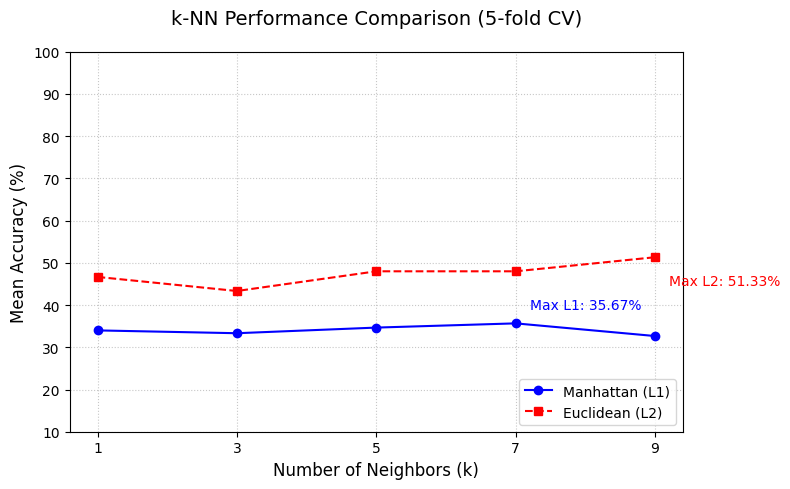


Mean Accuracies:
k=1: L1 = 34.00%, L2 = 46.67%
k=3: L1 = 33.33%, L2 = 43.33%
k=5: L1 = 34.67%, L2 = 48.00%
k=7: L1 = 35.67%, L2 = 48.00%
k=9: L1 = 32.67%, L2 = 51.33%


In [19]:
K = [1, 3, 5, 7, 9]
fold_accuracies_l1 = {k: [] for k in K}
fold_accuracies_l2 = {k: [] for k in K}

for i in range(n_folds):
    X_val, y_val = folds_X[i], folds_y[i]
    X_train = np.concatenate([folds_X[j] for j in range(n_folds) if j != i])
    y_train = np.concatenate([folds_y[j] for j in range(n_folds) if j != i])

    for k in K:
        correct_l1, correct_l2 = 0, 0
        for j in tqdm(range(len(X_val)), desc=f"Fold {i+1}, k={k}"):

            diff = X_train - X_val[j]
            distances_l1 = np.abs(diff).sum(axis=(1, 2))
            distances_l2 = np.sqrt((diff**2).sum(axis=(1, 2)))

            # L1 prediction
            nearest_l1 = np.argpartition(distances_l1, k)[:k]
            pred_l1 = Counter(y_train[nearest_l1]).most_common(1)[0][0]
            correct_l1 += (pred_l1 == y_val[j])

            # L2 prediction
            nearest_l2 = np.argpartition(distances_l2, k)[:k]
            pred_l2 = Counter(y_train[nearest_l2]).most_common(1)[0][0]
            correct_l2 += (pred_l2 == y_val[j])

        # Store accuracies
        accuracy_l1 = (correct_l1 / len(X_val)) * 100
        accuracy_l2 = (correct_l2 / len(X_val)) * 100
        fold_accuracies_l1[k].append(accuracy_l1)
        fold_accuracies_l2[k].append(accuracy_l2)
        print(f"Fold {i+1}, k={k}: L1 Accuracy = {accuracy_l1:.2f}%, L2 Accuracy = {accuracy_l2:.2f}%")

# Compute mean accuracies
mean_accuracy_l1 = [np.mean(fold_accuracies_l1[k]) for k in K]
mean_accuracy_l2 = [np.mean(fold_accuracies_l2[k]) for k in K]

plt.figure(figsize=(8, 5))
plt.plot(K, mean_accuracy_l1, marker='o', label='Manhattan (L1)', color='blue', linestyle='-')
plt.plot(K, mean_accuracy_l2, marker='s', label='Euclidean (L2)', color='red', linestyle='--')

plt.title("k-NN Performance Comparison (5-fold CV)", fontsize=14, pad=20)
plt.xlabel("Number of Neighbors (k)", fontsize=12)
plt.ylabel("Mean Accuracy (%)", fontsize=12)
plt.xticks(K)
plt.ylim(10, 100)
plt.grid(True, linestyle=':', alpha=0.7)
plt.legend(loc='lower right')

max_l1 = max(mean_accuracy_l1)
max_l2 = max(mean_accuracy_l2)

plt.annotate(f'Max L1: {max_l1:.2f}%', xy=(K[mean_accuracy_l1.index(max_l1)], max_l1), xytext=(10, 10), textcoords='offset points', color='blue')
plt.annotate(f'Max L2: {max_l2:.2f}%', xy=(K[mean_accuracy_l2.index(max_l2)], max_l2), xytext=(10, -20), textcoords='offset points', color='red')
plt.tight_layout()
plt.show()

print("\nMean Accuracies:")
for k, l1, l2 in zip(K, mean_accuracy_l1, mean_accuracy_l2):
    print(f"k={k}: L1 = {l1:.2f}%, L2 = {l2:.2f}%")

# Train final models with best k

In [21]:
best_k_l1 = max(fold_accuracies_l1, key=lambda k: np.mean(fold_accuracies_l1[k]))
best_k_l2 = max(fold_accuracies_l2, key=lambda k: np.mean(fold_accuracies_l2[k]))

print(f"Training final models with best k: L1={best_k_l1}, L2={best_k_l2}")

Training final models with best k: L1=7, L2=9


#Display top 5 predictions

Top 5 predictions:


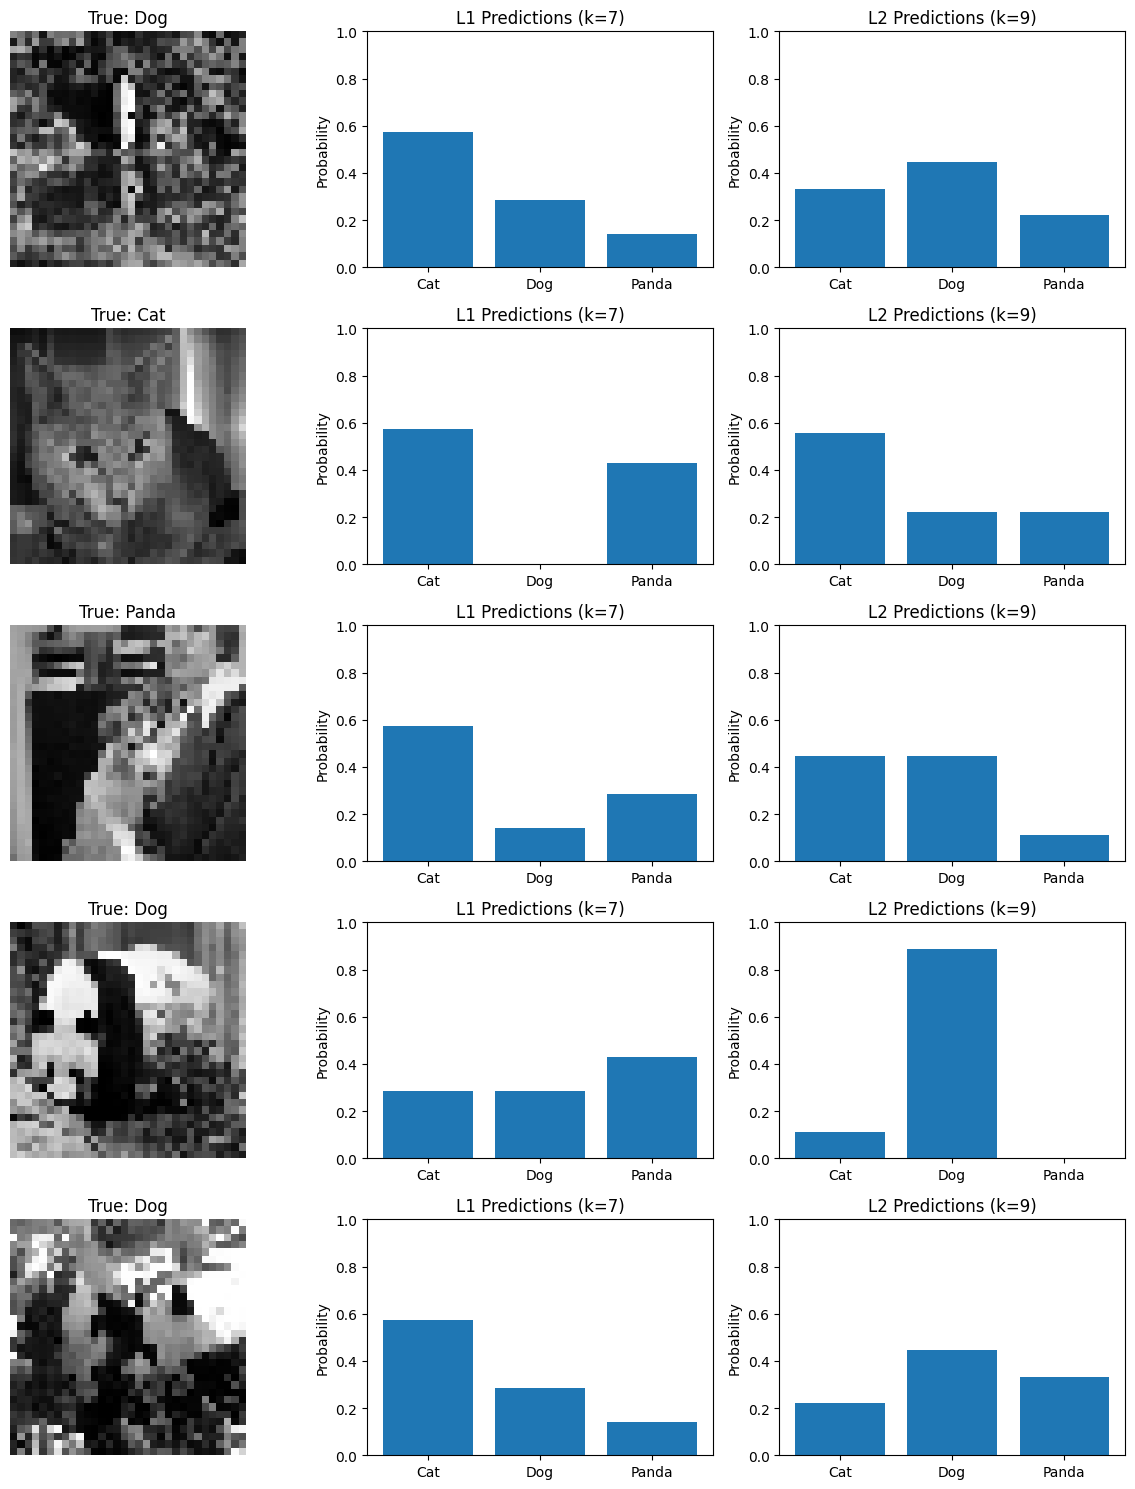

In [23]:
class_names = ['Cat', 'Dog', 'Panda']

def knn_predict_proba(X_train, y_train, X_test, k, distance_metric='l2'):
    probas = []
    for x in X_test:
        if distance_metric == 'l1':
            distances = np.abs(X_train - x).sum(axis=(1, 2))
        else:
            distances = np.sqrt(((X_train - x)**2).sum(axis=(1, 2)))

        nearest = y_train[np.argpartition(distances, k)[:k]]
        counts = np.bincount(nearest, minlength=len(class_names))
        probas.append(counts / counts.sum())
    return np.array(probas)

X_grayscale = np.array([x[0] for x in train_data])

print("Top 5 predictions:")
fig, axes = plt.subplots(5, 3, figsize=(12, 15))

for i in range(5):
    idx = np.random.randint(0, len(X))
    test_image = X[idx].reshape(1, 32, 32)
    true_label = y[idx]

    pred_proba_l1 = knn_predict_proba(X, y, test_image, best_k_l1, 'l1')[0]
    pred_proba_l2 = knn_predict_proba(X, y, test_image, best_k_l2, 'l2')[0]

    # Display original image
    axes[i, 0].imshow(X_grayscale[idx], cmap='gray')
    axes[i, 0].set_title(f"True: {class_names[true_label]}")
    axes[i, 0].axis('off')

    # Display L1 predictions
    axes[i, 1].bar(class_names, pred_proba_l1)
    axes[i, 1].set_title(f"L1 Predictions (k={best_k_l1})")
    axes[i, 1].set_ylim(0, 1)
    axes[i, 1].set_ylabel("Probability")

    # Display L2 predictions
    axes[i, 2].bar(class_names, pred_proba_l2)
    axes[i, 2].set_title(f"L2 Predictions (k={best_k_l2})")
    axes[i, 2].set_ylim(0, 1)
    axes[i, 2].set_ylabel("Probability")

plt.tight_layout()
plt.show()

#Discussion:
Based on the results, we can compare the performance of Manhattan (L1) and Euclidean (L2) distances:
- The best accuracy with L1 was 35.67% at k=7
- The best accuracy with L2 was 51.33% at k=9
- Euclidean (L2) distance performed better for this dataset.